In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import mixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import MDS

sns.set(style="darkgrid")

## Load data from SplitStrains

In [2]:
f = '/home/user1/Documents/lab/DrugResistance/splitStrains/data/mixed_synth_samples/output/70_10/freqVec.filter.csv'
freqVec = np.loadtxt(open(f, "r"), delimiter=",")

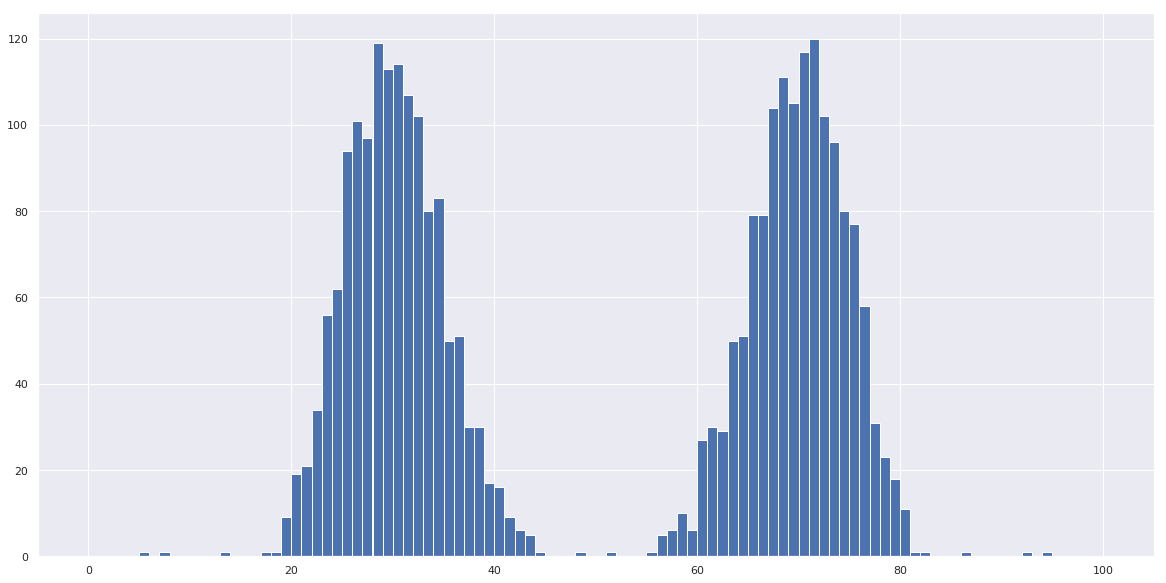

In [3]:
freqVecFlat = freqVec.flatten()
freqVecFlat = freqVecFlat[freqVecFlat > 5]
freqVecFlat = freqVecFlat[freqVecFlat < 95]
plt.figure(figsize = (20,10))
plt.hist(freqVecFlat, bins=100, range=(0,100), label='Proportion (lin scale)')
plt.show()

## Filter data

In [4]:
freqVecFilt = []
for a in freqVec:
    if a[0:4].max() < 95:
        freqVecFilt.append(a)

## PCA

In [5]:
freqVec = np.array(freqVecFilt)
print(freqVec)
n = len(freqVec)
x = StandardScaler().fit_transform(freqVec[0:n])
pca = PCA(n_components=2, whiten=True)
pcaData = pca.fit_transform(x)

[[0.000000e+00 7.191011e+01 0.000000e+00 2.808989e+01 1.901851e+06]
 [2.708333e+01 0.000000e+00 7.291667e+01 0.000000e+00 1.902228e+06]
 [2.038835e+01 0.000000e+00 0.000000e+00 7.961165e+01 1.902584e+06]
 ...
 [0.000000e+00 6.530612e+01 0.000000e+00 3.469388e+01 2.899729e+06]
 [0.000000e+00 0.000000e+00 6.000000e+01 4.000000e+01 2.899889e+06]
 [2.900000e+01 0.000000e+00 0.000000e+00 7.100000e+01 2.900095e+06]]


## Plot PCA

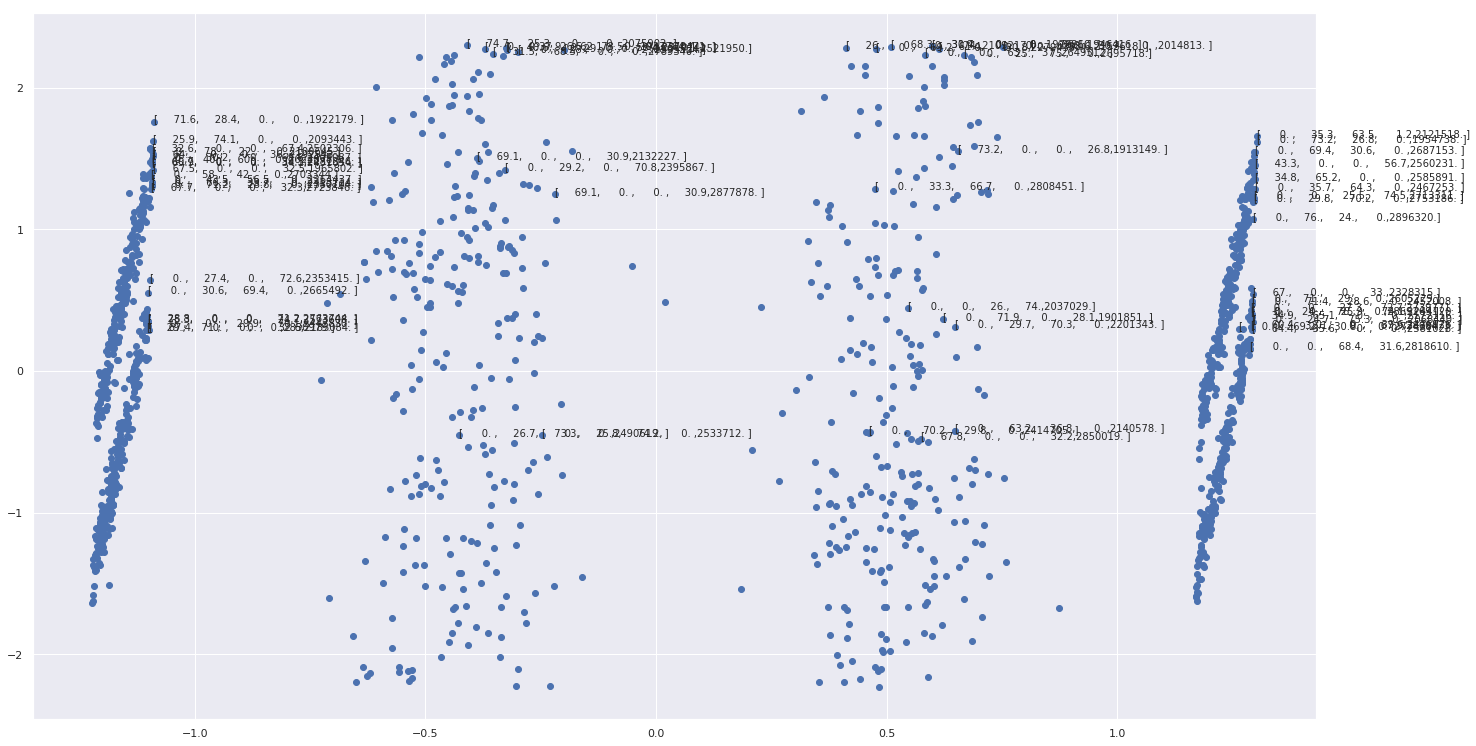

In [6]:
plt.figure(figsize = (23,13))
plt.scatter(pcaData[:,0], pcaData[:,1])

for i, txt in enumerate(freqVec[0:n][::20]):
    txt = np.array2string(txt, precision=1, separator=',', suppress_small=True)
    plt.annotate(txt,(pcaData[i,0],pcaData[i,1]))
plt.show()

## Take out position axis and do PCA again

In [7]:
freqVecNoPos = freqVec[:,0:-1]
print(freqVecNoPos)
n = len(freqVecNoPos)
x = StandardScaler().fit_transform(freqVecNoPos[0:n])
pca = PCA(n_components=2, whiten=True)
pcaData = pca.fit_transform(x)

[[ 0.      71.91011  0.      28.08989]
 [27.08333  0.      72.91667  0.     ]
 [20.38835  0.       0.      79.61165]
 ...
 [ 0.      65.30612  0.      34.69388]
 [ 0.       0.      60.      40.     ]
 [29.       0.       0.      71.     ]]


## Plot PCA with no position index

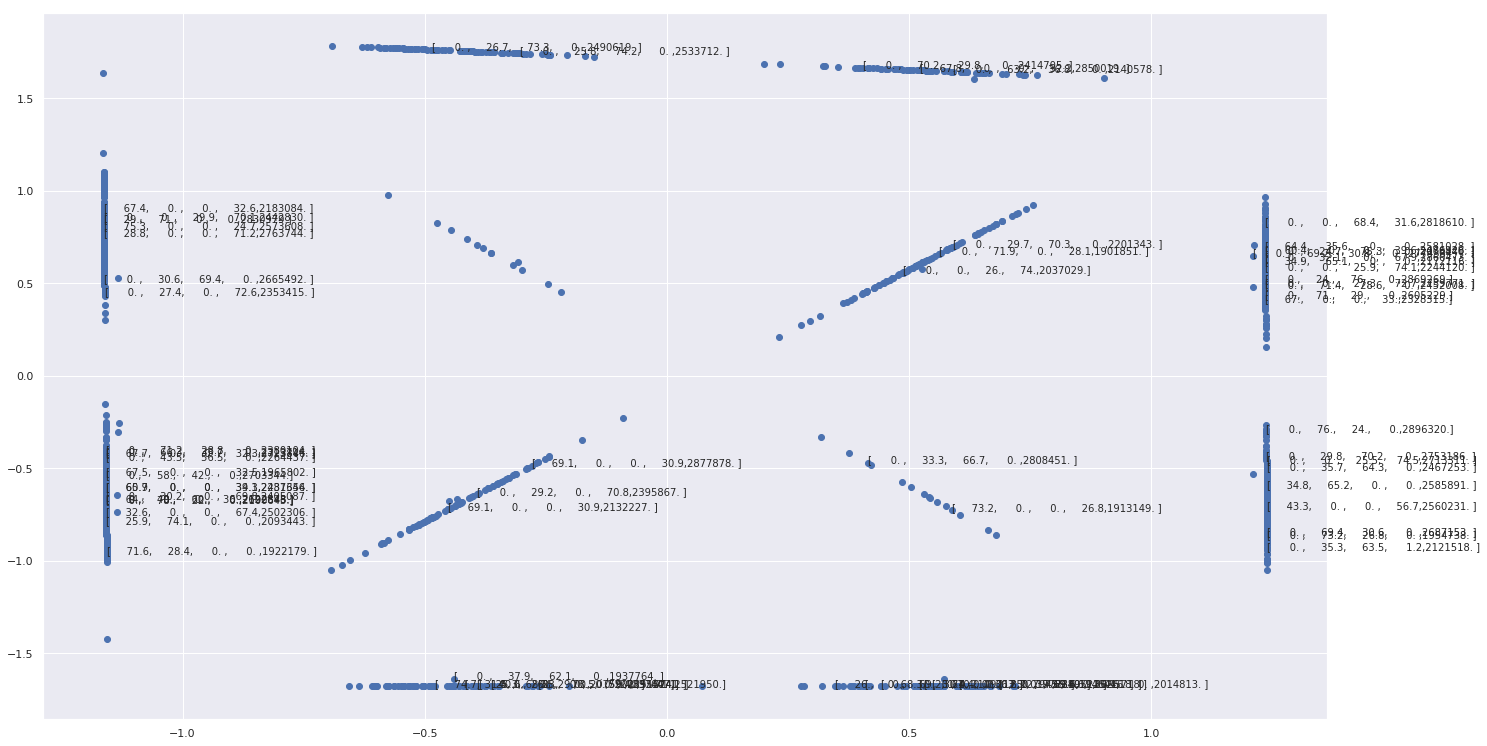

In [8]:
plt.figure(figsize = (23,13))
plt.scatter(pcaData[:,0], pcaData[:,1])
for i, txt in enumerate(freqVec[0:n][::20]):
    txt = np.array2string(txt, precision=1, separator=',', suppress_small=True)
    plt.annotate(txt,(pcaData[i,0],pcaData[i,1]))
plt.show()

## MDS

In [9]:
embedding = MDS(n_components=2)
mdsData = embedding.fit_transform(freqVecNoPos)

## Plot MDS

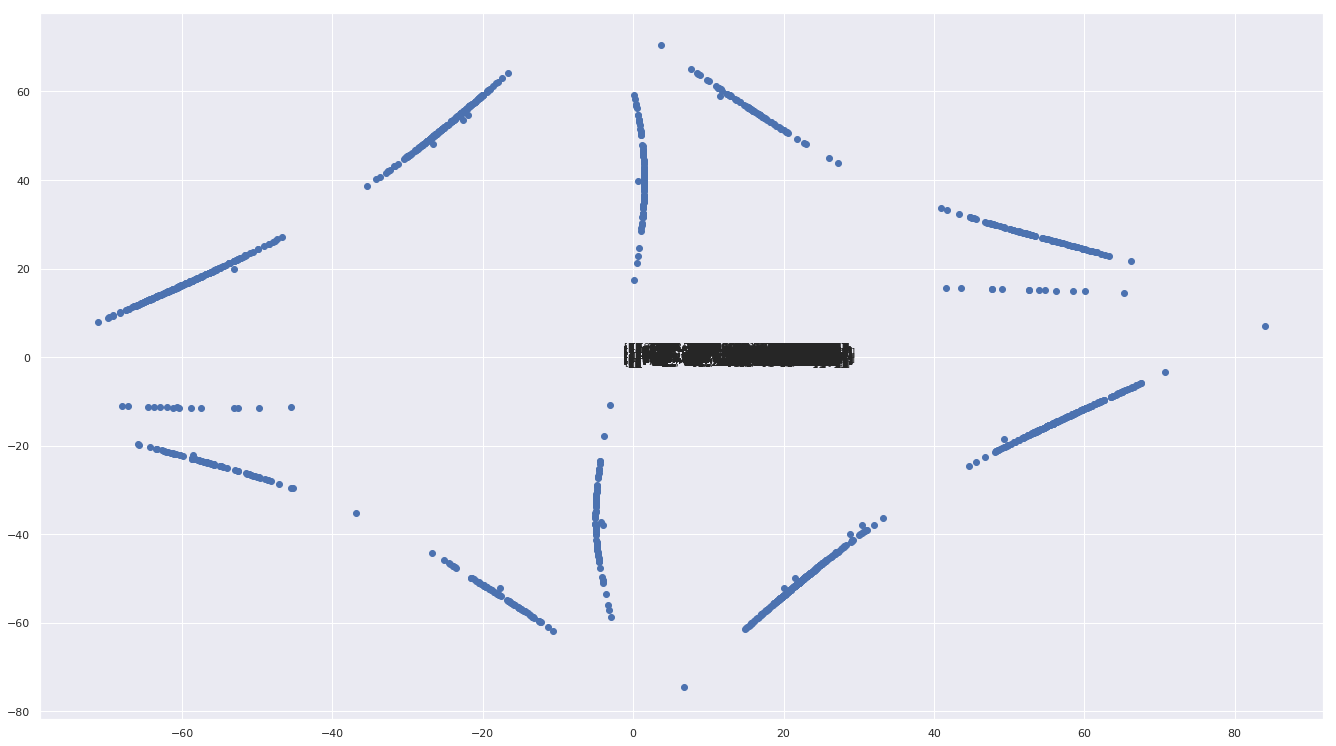

In [10]:
plt.figure(figsize = (23,13))
plt.scatter(mdsData[:,0], mdsData[:,1])
for i, txt in enumerate(freqVec[0:n][::1]):
    txt = np.array2string(txt, precision=1, separator=',', suppress_small=True)
    plt.annotate(txt,(pcaData[i,0],pcaData[i,1]))
plt.show()

## Create 2d point cloud representing proportions
## Each point has the following entries (proportion, position)

In [11]:
dataPoints = []
for a in freqVec:
    for v in a[0:-1]:
        dataPoints.append([a[4],v])
dataPoints = np.array(dataPoints)
print(dataPoints)


[[1.901851e+06 0.000000e+00]
 [1.901851e+06 7.191011e+01]
 [1.901851e+06 0.000000e+00]
 ...
 [2.900095e+06 0.000000e+00]
 [2.900095e+06 0.000000e+00]
 [2.900095e+06 7.100000e+01]]


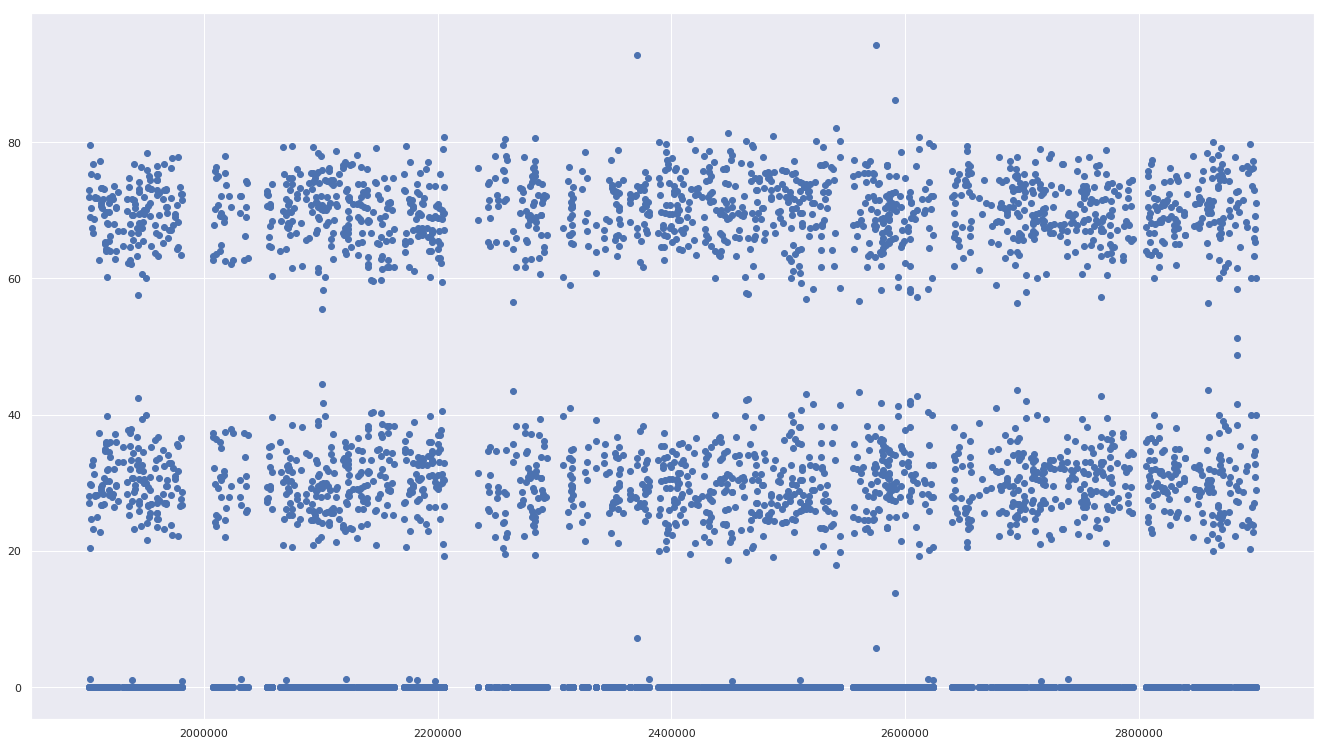

In [13]:
plt.figure(figsize = (23,13))
plt.scatter(dataPoints[:,0], dataPoints[:,1])
plt.show()